<a href="https://colab.research.google.com/github/sowji2604/MY-PHP/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikramamin/bank-loan-approval-lr-dt-rf-and-auc")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bank-loan-approval-lr-dt-rf-and-auc


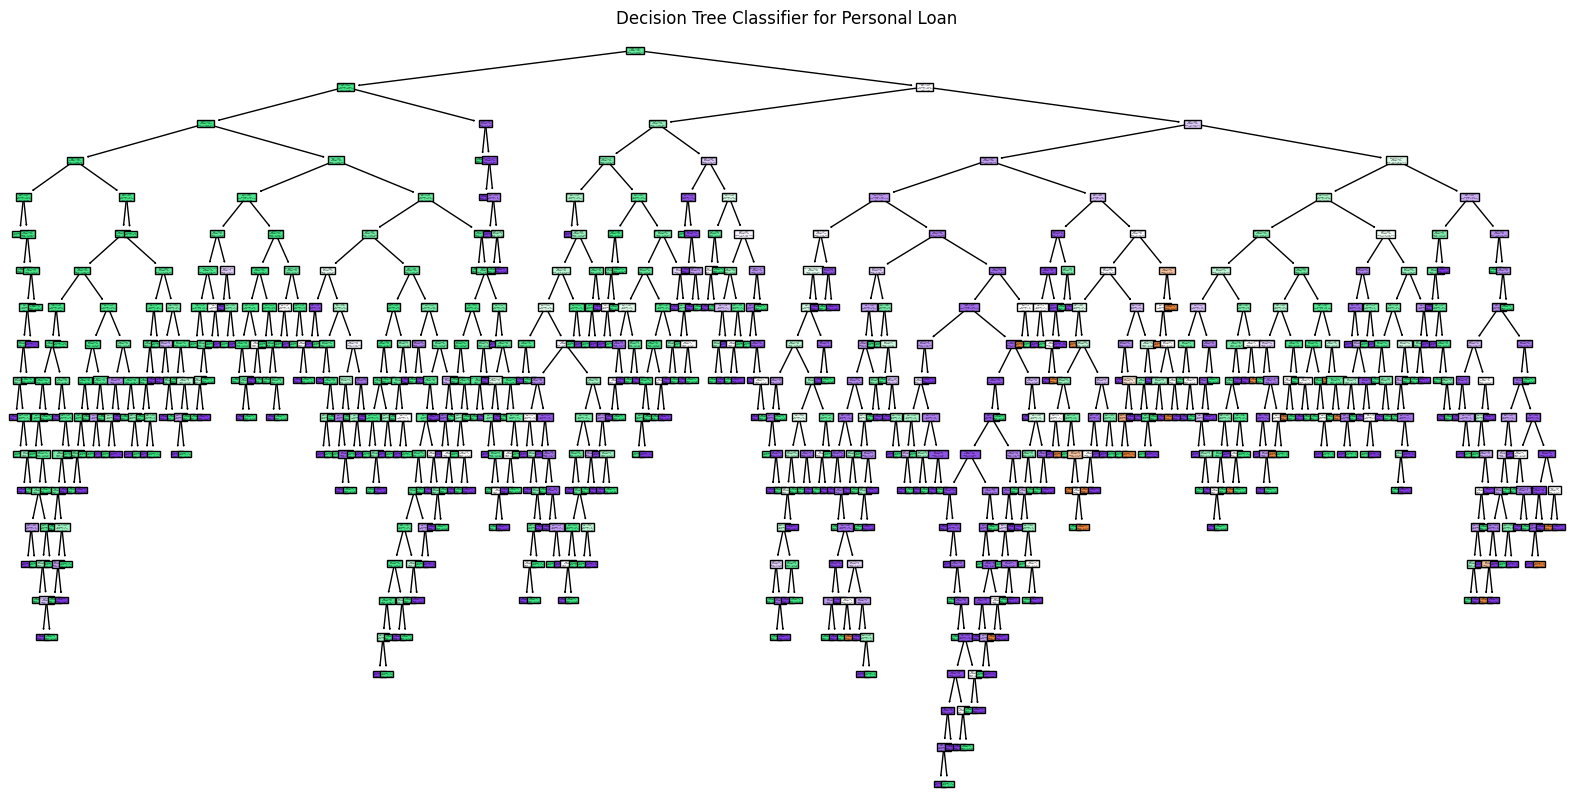

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('/kaggle/input/bank-loan-approval-lr-dt-rf-and-auc/bankloan.csv')
# Clean column names (remove hidden spaces)
df.columns = df.columns.str.strip()

# Prepare data
target_col = 'CCAvg'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical variables
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
    class_names = y.unique()
elif y.dtype in [np.int64, np.float64]:
    bins = [y.min(), 3,8, y.max()]
    labels = ['Low', 'Medium', 'High']
    y = pd.cut(y, bins=bins, labels=labels, include_lowest=True)
    class_names = labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Classifier for Personal Loan")
plt.show()